In [1]:
import pandas as pd
import requests
import datetime
from datetime import datetime, timezone, date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import tweepy
import json
import yfinance as yf
import numpy as np
from tqdm import tqdm

# Get Tickers

### NYSE

In [2]:
# ticker_response = requests.get('https://api.polygon.io/v3/reference/tickers?'
#                                + 'exchange=XNYS' + '&active=true' + '&market=stocks' + '&sort=ticker' + '&order=asc'
#                                + '&limit=1000' + '&apiKey=' + api_key)

In [3]:
# ticker_response.json()

### NASDAQ

In [4]:
# ticker_response = requests.get('https://api.polygon.io/v3/reference/tickers?'
#                                + 'exchange=XNAS' + '&active=true' + '&market=stocks' + '&sort=ticker' + '&order=asc'
#                                + '&limit=1000' + '&apiKey=' + api_key)

In [5]:
# ticker_response.json()

# Collect Stock Data

In [6]:
ticker = 'AAPL'

### Company Information

In [7]:
api_key = 'Y4rX3YscZ6FnAuzRIVVWaYzneuZJwlTl'

In [8]:
company_response = requests.get('https://api.polygon.io/v1/meta/symbols/' + ticker
                               + '/company?apiKey=' + api_key)

In [9]:
stock_info = dict(company_response.json())

### Company Financials

In [372]:
company_response = requests.get('https://api.polygon.io/vX/reference/financials?ticker=' + ticker
                                +'&apiKey=' + api_key)

In [373]:
stock_financials = dict(company_response.json())

In [523]:
np.round(stock_financials['results'][0]['financials']['income_statement']['revenues']['value']/1000000000, 2)

81.43

### Stock Price Information

In [10]:
url = "https://yh-finance.p.rapidapi.com/stock/v2/get-chart"

querystring = {"interval":"1d","symbol": ticker,"range":"5y","region":"US"}

headers = {
    'x-rapidapi-host': "yh-finance.p.rapidapi.com",
    'x-rapidapi-key': "a8ff9fd49amsh64d09f9fe39d03fp1de1d0jsn90f0fdef076b"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [11]:
stock_price_chart = dict(response.json())['chart']['result'][0]

In [12]:
stock_meta = stock_price_chart['meta']

In [13]:
stock_dates = [datetime.fromtimestamp(x) for x in stock_price_chart['timestamp']]
stock_dates = [str(x.year) + '-' + str(x.month) + '-' + str(x.day) for x in stock_dates]

In [14]:
stock_low = stock_price_chart['indicators']['quote'][0]['low']
stock_high = stock_price_chart['indicators']['quote'][0]['high']
stock_open = stock_price_chart['indicators']['quote'][0]['open']
stock_close = stock_price_chart['indicators']['quote'][0]['close']
stock_volume = stock_price_chart['indicators']['quote'][0]['volume']

In [15]:
pd.DataFrame({
    'Date': stock_dates,
    'Low': stock_low,
    'High': stock_high,
    'Open': stock_open,
    'Close': stock_close,
    'Volume': stock_volume
})

,Date,Low,High,Open,Close,Volume
0,2016-12-5,27.062500,27.507500,27.500000,27.277500,137298000
1,2016-12-6,27.297501,27.590000,27.375000,27.487499,104782000
2,2016-12-7,27.290001,27.797501,27.315001,27.757500,119994800
3,2016-12-8,27.650000,28.107500,27.715000,28.030001,108273200
4,2016-12-9,28.077499,28.674999,28.077499,28.487499,137610400
...,...,...,...,...,...,...
1254,2021-11-29,158.789993,161.190002,159.369995,160.240005,88748200
1255,2021-11-30,159.919998,165.520004,159.990005,165.300003,174048100
1256,2021-12-1,164.529999,170.300003,167.479996,164.770004,152052500
1257,2021-12-2,157.800003,164.199997,158.740005,163.759995,136474900


In [478]:
update_date = str(datetime.now().year) + '-' + str(datetime.now().month) + '-' + str(datetime.now().day) 

In [479]:
stock_dict = {
    "Ticker":ticker,
    "Stock Info": stock_info,
    "Stock Financials": stock_financials,
    "Stock Meta":stock_meta,
    "Stock Dates": stock_dates,
    "Stock Low": stock_low,
    "Stock High": stock_high,
    "Stock Open": stock_open,
    "Stock Close": stock_close,
    "Stock Volume": stock_volume,
    "Last-Update": update_date
}

In [480]:
df_stock = pd.DataFrame({
    "Date": stock_dict["Stock Dates"],
    "Low": stock_dict["Stock Dates"],
    "High": stock_dict["Stock High"],
    "Open": stock_dict["Stock Open"],
    "Close": stock_dict["Stock Close"],
    "Volume": stock_dict["Stock Volume"]
})

In [492]:
np.round(stock_dict['Stock Info']['marketcap']/1000000000, 2)

908.32

In [513]:
stock_dict['Stock Financials']['results'][0]['fiscal_period']

'Q3'

In [514]:
stock_dict['Stock Financials']['results'][0]['fiscal_year']

'2021'

In [529]:
stock_dict['Stock Financials']['results'][0]['financials']['income_statement']['basic_earnings_per_share']['value']

1.31

In [531]:
gross_profit = np.round(stock_dict['Stock Financials']['results'][0]['financials']['income_statement']['gross_profit']['value']
                        /1000000000, 2)

In [532]:
gross_profit

35.26

# YFinance

In [583]:
ticker_yf = yf.Ticker("TSLA")

In [589]:
'trailingAnnualDividendYield' not in ticker_yf.info.keys()

False

In [ ]:
np.round(ticker_yf.info['marketCap']/1000000000,2)

In [ ]:
ticker_yf.quarterly_cashflow

In [ ]:
ticker_yf.quarterly_financials

In [ ]:
ticker_yf.quarterly_earnings

In [ ]:
ticker_yf.info.keys()

In [ ]:
ticker_yf.info['trailingAnnualDividendYield']*100

In [ ]:
stock_dict['YF Info']['marketCap']

In [ ]:
ticker_yf.news[0:5]

### Write Out to Desktop

In [127]:
df_stock.to_csv("../Data/AAPL.csv")

### Send to Firebase

In [151]:
url = 'https://stock-price-predictor-af4ea-default-rtdb.firebaseio.com/'

In [152]:
ticker_put_url = url + ticker + '.json'

In [153]:
response = requests.put( ticker_put_url, data=json.dumps(stock_dict) )

# Twitter Information (Lost Cause)

In [13]:
consumer_key = '7TiysPCAezYZAYbKXlByQrD3v'
consumer_secret = 'iHktyxghooHJvIHRF6xHdr3KvZeNCtYxo7vrEJlz2LBmOwvaaz'
access_token = '452862151-agKSJhfYb0ho2nBdlLgpjbZSf6K80bm5apiPdJwL'
access_secret = 'Yg6wXVo75WxPUeQyuk8t6A1stDlaIscRWpzzERkiVQNi7'
bearer = 'AAAAAAAAAAAAAAAAAAAAAHlNUwEAAAAAUrQ5vQKy1iuNtdoH6CYoJz2FQSY%3DQ7cBzPi9YLQBL3CVJEl7Xjt9iNqvYDw5xBAJJOmVswvUwSxTMI'

### Extract Tweets

In [14]:
now = datetime.now().replace(hour=datetime.now().hour, minute=0, second=0, microsecond=0)

In [15]:
dtformat = '%Y-%m-%dT%H:%M:%SZ'

In [16]:
dfs = []

# just for checking
currs = []
lasts = []

curr_hr = now.strftime(dtformat)

for i in range(1, 24*6):
    last_hr = (now + timedelta(hours=-i)).strftime(dtformat)

    endpoint = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'authorization': f'Bearer {bearer}'}

    params = {
        'query': '(aapl OR tim cook) (lang:en)',
        'max_results': '100',
        'tweet.fields': 'created_at,lang',
        'start_time': last_hr,
        'end_time': curr_hr
    }

    response = requests.get(endpoint,
                                params=params,
                                headers=headers)

    tweets_dict = dict(response.json())['data']
    time = [last_hr for x in range(0, len(tweets_dict))]
    tweets = []
    for tweet in tweets_dict:
        tweets.append(tweet['text'])

    df_tweets = pd.DataFrame({
        'time':time,
        'tweet': tweets
    })
    
    currs.append(curr_hr)
    lasts.append(last_hr)
    
    dfs.append(df_tweets)
    
    curr_hr = last_hr

In [20]:
df_tweets = pd.concat(dfs).reset_index(drop=True)

In [21]:
df_tweets

,time,tweet
0,2021-11-24T22:00:00Z,My pick for best performance starting now unti...
1,2021-11-24T22:00:00Z,"Apple CEO Tim Cook Talks Self Service Repair, ..."
2,2021-11-24T22:00:00Z,"RT @harinarayananpc: Tim ""Cook"" now makes sense.😂"
3,2021-11-24T22:00:00Z,"RT @falcon_fintwit: For a real world example, ..."
4,2021-11-24T22:00:00Z,@zorn Ugh. I haven’t tried a build with the la...
...,...,...
13885,2021-11-19T00:00:00Z,Totally wrong . I 100% would buy an $tsla pho...
13886,2021-11-19T00:00:00Z,RT @squawksquare: Look at how long $TSLA has b...
13887,2021-11-19T00:00:00Z,RT @CannabisHempCBD: Meme stock $SNDL plans t...
13888,2021-11-19T00:00:00Z,RT @munster_gene: $AAPL up almost 3% today on ...


In [22]:
# check to see if the times are accurate
pd.DataFrame({
    'start':lasts,
    'end': currs
}).head(3)

,start,end
0,2021-11-24T22:00:00Z,2021-11-24T23:00:00Z
1,2021-11-24T21:00:00Z,2021-11-24T22:00:00Z
2,2021-11-24T20:00:00Z,2021-11-24T21:00:00Z


In [24]:
max_time = datetime.strptime(df_tweets['time'].max(), dtformat)
min_time = datetime.strptime(df_tweets['time'].min(), dtformat)

In [32]:
# datetime(hold.year, hold.month, hold.day)

In [26]:
stock = yf.Ticker("AAPL")
df_stock = stock.history(
    start=datetime(min_time.year, min_time.month, min_time.day),
    interval='60m'
).reset_index()

In [31]:
df_stock['Datetime'][0].minute

30

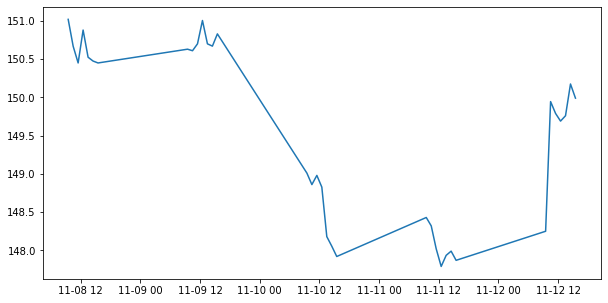

In [453]:
plt.figure(figsize=(10,5))
plt.plot(df_stock['Datetime'], df_stock['Close'])

In [460]:
transform = df_stock['Datetime'][0]

In [461]:
transform

Timestamp('2021-11-08 09:30:00-0500', tz='America/New_York')

In [465]:
df_tweets['time']

0        2021-11-14T18:00:00Z
1        2021-11-14T18:00:00Z
2        2021-11-14T18:00:00Z
3        2021-11-14T18:00:00Z
4        2021-11-14T18:00:00Z
                 ...         
13941    2021-11-08T20:00:00Z
13942    2021-11-08T20:00:00Z
13943    2021-11-08T20:00:00Z
13944    2021-11-08T20:00:00Z
13945    2021-11-08T20:00:00Z
Name: time, Length: 13946, dtype: object